### One Sample T- test

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, shapiro, probplot, t
import numpy as np


In [6]:
# Load the dataset 
df = pd.read_csv('D:\Documents\Year3\Stat\Assignment\weather_data (1).csv')


In [7]:
df.dtypes

date                object
avg_temperature    float64
humidity           float64
avg_wind_speed     float64
rain_or_not         object
cloud_cover        float64
pressure           float64
dtype: object

In [8]:
#Checking missing values
df.isnull().sum()

date                0
avg_temperature    15
humidity           15
avg_wind_speed     15
rain_or_not         0
cloud_cover        15
pressure            0
dtype: int64

In [9]:
# Filter non-rainy days (assuming 'rainfall' column exists and 0 means no rain)
non_rainy_days = df[df["rain_or_not"] != "Rain"]['cloud_cover'].dropna()

In [10]:
# Take a random sample of 50 cloud cover values
sample = non_rainy_days.sample(n=50, random_state=1)

In [ ]:
#  1. Normality Test
print("Normality Test (Shapiro-Wilk):")
shapiro_stat, shapiro_p = shapiro(sample)
print(f"Shapiro-Wilk Test Statistic = {shapiro_stat:.4f}, p-value = {shapiro_p:.4f}")

if shapiro_p > 0.05:
    print("Data appears normally distributed (p > 0.05)")
else:
    print("Data may not be normally distributed (p ≤ 0.05)")

Normality Test (Shapiro-Wilk):
Shapiro-Wilk Test Statistic = 0.9643, p-value = 0.1349
Data appears normally distributed (p > 0.05)


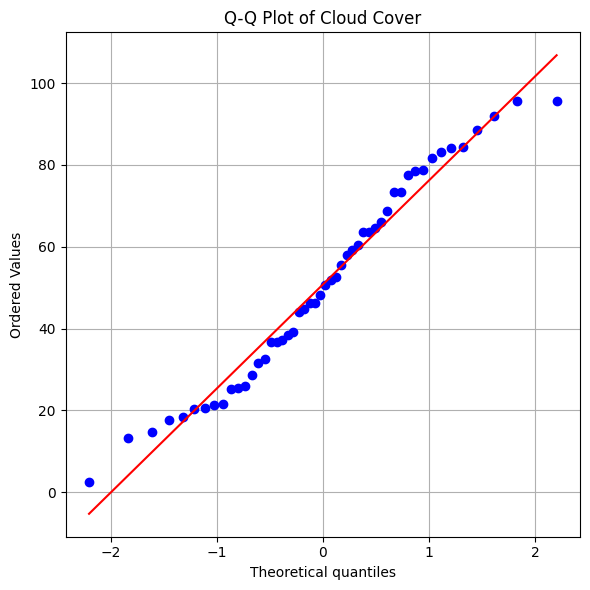

In [24]:
# Q-Q Plot to visually assess normality
plt.figure(figsize=(6, 6))
probplot (sample, dist="norm", plot=plt)
plt.title('Q-Q Plot of Cloud Cover')
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
t_stat, p_value = ttest_1samp(sample, popmean=50)

# Adjust p-value for one-tailed test (left tail)
p_value_one_tailed = p_value / 2

print("\nOne-Tailed One-Sample t-test (H1: mean < 50):")
print(f"Sample Mean = {sample.mean():.2f}")
print(f"Sample Std Dev = {sample.std():.2f}")
print(f"Sample Size = {len(sample)}")
dfree = len(sample) - 1
print(f"Degree of Freedom = {dfree}")
print(f"t-statistic = {t_stat:.4f}, one-tailed p-value = {p_value_one_tailed:.4f}")

# Critical t-value for one-tailed test, α = 0.05
dfree = len(sample) - 1
critical_t = t.ppf(0.05, df=dfree)
print(f"Critical t-value (left-tailed, α=0.05): {critical_t:.3f}")

if t_stat < critical_t:
    print("Reject the null hypothesis: Average cloud cover is significantly less than 50% on non-rainy days.")
else:
    print("Fail to reject the null hypothesis: Not enough evidence that average cloud cover is less than 50% on non-rainy days.")


One-Tailed One-Sample t-test (H1: mean < 50):
Sample Mean = 50.77
Sample Std Dev = 25.08
Sample Size = 50
Degree of Freedom = 49
t-statistic = 0.2174, one-tailed p-value = 0.4144
Critical t-value (left-tailed, α=0.05): -1.677
Fail to reject the null hypothesis: Not enough evidence that average cloud cover is less than 50% on non-rainy days.


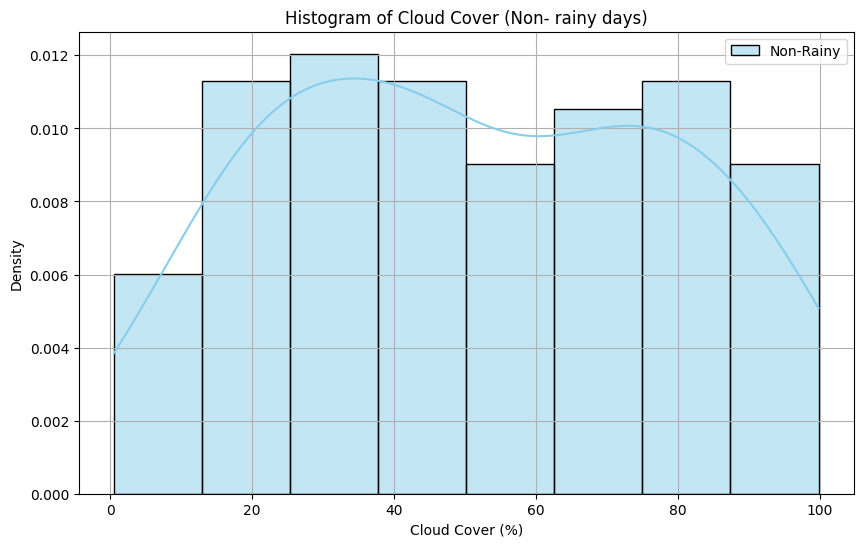

In [9]:
import seaborn as sns
# 2. Histogram Comparison
plt.figure(figsize=(10, 6))
sns.histplot(non_rainy_days, kde=True, color='skyblue', label='Non-Rainy', stat="density")
plt.title('Histogram of Cloud Cover (Non- rainy days)')
plt.xlabel('Cloud Cover (%)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

### Two-Sample T test

Normality Test (Shapiro-Wilk):
Rainy Days - Shapiro-Wilk Statistic = 0.9419, p-value = 0.0000
Non-Rainy Days - Shapiro-Wilk Statistic = 0.9614, p-value = 0.0034
Rainy Days - Shapiro-Wilk Statistic = 0.9356, p-value = 0.0091
Non-Rainy Days - Shapiro-Wilk Statistic = 0.9709, p-value = 0.2528


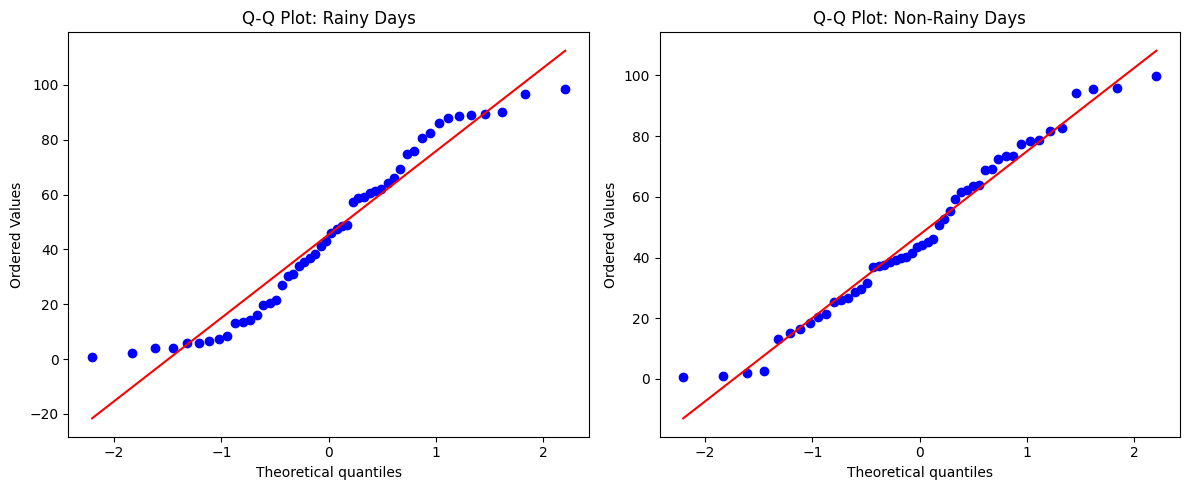

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, shapiro, probplot, levene

# Load the dataset
df = pd.read_csv('D:\\Documents\\Year3\\Stat\\Assignment\\weather_data (1).csv')

# Drop missing values
df = df.dropna(subset=['cloud_cover', "rain_or_not"])

# Filter into rainy and non-rainy days
rainy = df[df["rain_or_not"] == "Rain"]['cloud_cover']
non_rainy = df[df["rain_or_not"] != "Rain"]['cloud_cover']

# Take a random sample of 50 from each group for equal comparison
rainy_sample = rainy.sample(50, random_state=42)
non_rainy_sample = non_rainy.sample(50, random_state=42)

# ---------- 1. Normality Tests ----------
print("Normality Test (Shapiro-Wilk):")
# Rainy Days-population
shapiro_rainy_stat, shapiro_rainy_p = shapiro(rainy)
print(f"Rainy Days - Shapiro-Wilk Statistic = {shapiro_rainy_stat:.4f}, p-value = {shapiro_rainy_p:.4f}")

# Non-Rainy Days-popultaion
shapiro_nonrainy_stat, shapiro_nonrainy_p = shapiro(non_rainy)
print(f"Non-Rainy Days - Shapiro-Wilk Statistic = {shapiro_nonrainy_stat:.4f}, p-value = {shapiro_nonrainy_p:.4f}")

# Rainy Days-sample
shapiro_rainy_stat, shapiro_rainy_p = shapiro(rainy_sample)
print(f"Rainy Days - Shapiro-Wilk Statistic = {shapiro_rainy_stat:.4f}, p-value = {shapiro_rainy_p:.4f}")

# Non-Rainy Days-sample
shapiro_nonrainy_stat, shapiro_nonrainy_p = shapiro(non_rainy_sample)
print(f"Non-Rainy Days - Shapiro-Wilk Statistic = {shapiro_nonrainy_stat:.4f}, p-value = {shapiro_nonrainy_p:.4f}")

# Q-Q Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
probplot(rainy_sample, dist="norm", plot=plt)
plt.title('Q-Q Plot: Rainy Days')

plt.subplot(1, 2, 2)
probplot(non_rainy_sample, dist="norm", plot=plt)
plt.title('Q-Q Plot: Non-Rainy Days')

plt.tight_layout()
plt.show()



In [2]:
# Levene’s Test for equal variances
levene_stat, levene_p = levene(rainy_sample, non_rainy_sample)
print("Levene’s Test for Equal Variance:")
print(f"Levene’s Test Statistic = {levene_stat:.4f}, p-value = {levene_p:.4f}")
if levene_p > 0.05:
    print("Variances are equal (p > 0.05). Use standard t-test.")
    equal_var = True
else:
    print("Variances are not equal (p ≤ 0.05). Use Welch's t-test.")
    equal_var = False

# Perform Two-Sample t-test
t_stat, p_value = ttest_ind(rainy_sample, non_rainy_sample, equal_var=equal_var)

# Degrees of freedom (approximate if Welch's test)
dfree = 50 + 50 - 2 if equal_var else 'Welch-Adjusted'

print("\nTwo-Sample T-Test Results:")
print(f"Rainy Days Mean = {rainy_sample.mean():.2f}, Std Dev = {rainy_sample.std():.2f}")
print(f"Non-Rainy Days Mean = {non_rainy_sample.mean():.2f}, Std Dev = {non_rainy_sample.std():.2f}")
print(f"t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")
print(f"Degrees of Freedom = {dfree}")

# Decision Rule
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Mean cloud cover differs between rainy and non-rainy days.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean cloud cover.")

Levene’s Test for Equal Variance:
Levene’s Test Statistic = 1.6420, p-value = 0.2031
Variances are equal (p > 0.05). Use standard t-test.

Two-Sample T-Test Results:
Rainy Days Mean = 45.45, Std Dev = 30.39
Non-Rainy Days Mean = 47.57, Std Dev = 27.01
t-statistic = -0.3699, p-value = 0.7123
Degrees of Freedom = 98
Fail to reject the null hypothesis: No significant difference in mean cloud cover.


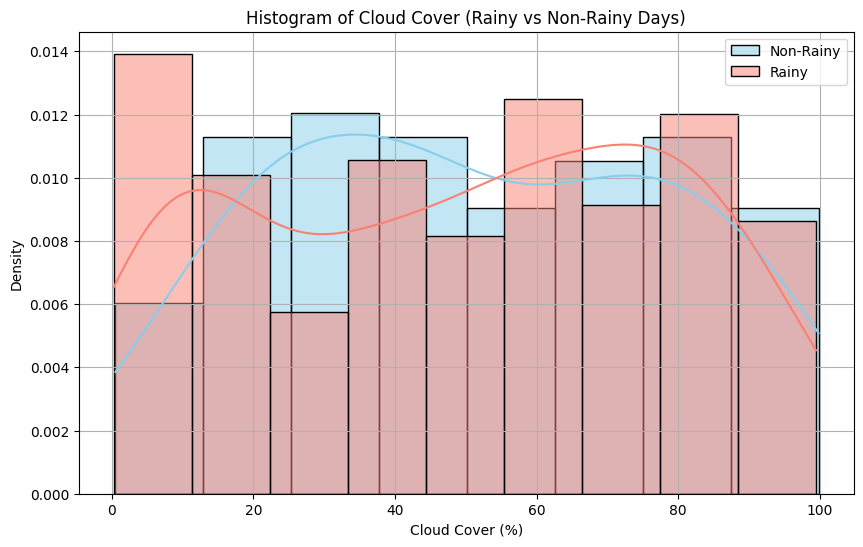

In [4]:
import seaborn as sns
# 2. Histogram Comparison
plt.figure(figsize=(10, 6))
sns.histplot(non_rainy, kde=True, color='skyblue', label='Non-Rainy', stat="density")
sns.histplot(rainy, kde=True, color='salmon', label='Rainy', stat="density")
plt.title('Histogram of Cloud Cover (Rainy vs Non-Rainy Days)')
plt.xlabel('Cloud Cover (%)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()
